In [1]:
import torch
from GEM_module_sparse import Generalized_EM
from utils_sparse import *
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import time
import scipy.sparse as sp
from sparsemax import Sparsemax

tensor([[ 7,  1, -1, -1],
        [ 0,  8,  2, -1],
        [ 1,  9,  3, -1],
        [ 2, 10,  4, -1],
        [ 3, 11,  5, -1],
        [ 4, 12,  6, -1],
        [ 5, 13, -1, -1],
        [ 0, 14,  8, -1],
        [ 7,  1, 15,  9],
        [ 8,  2, 16, 10],
        [ 9,  3, 17, 11],
        [10,  4, 18, 12],
        [11,  5, 19, 13],
        [12,  6, 20, -1],
        [ 7, 21, 15, -1],
        [14,  8, 22, 16],
        [15,  9, 23, 17],
        [16, 10, 24, 18],
        [17, 11, 25, 19],
        [18, 12, 26, 20],
        [19, 13, 27, -1],
        [14, 28, 22, -1],
        [21, 15, 29, 23],
        [22, 16, 30, 24],
        [23, 17, 31, 25],
        [24, 18, 32, 26],
        [25, 19, 33, 27],
        [26, 20, 34, -1],
        [21, 35, 29, -1],
        [28, 22, 36, 30],
        [29, 23, 37, 31],
        [30, 24, 38, 32],
        [31, 25, 39, 33],
        [32, 26, 40, 34],
        [33, 27, 41, -1],
        [28, 42, 36, -1],
        [35, 29, 43, 37],
        [36, 30, 44, 38],
        [37,

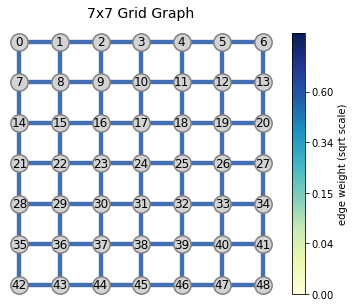

y.shape torch.Size([512, 49])


In [2]:
n_row = 7
kernel = 5
assert kernel % 2 == 1, "kernel size must be odd"
k = kernel ** 2 - 1
feature_dim = 6
num_nodes = n_row * n_row
# signal generation
y = y = generate_y_from_grid(n_row, sigma=0.4, n=512)
print('y.shape', y.shape)  # (128, num_nodes)

# base graph generation
nearest_neighbors = generate_kNN_from_grid(n_row, kernel, k)
neighbor_mask = nearest_neighbors != -1

In [3]:
def Experiment(arg_dict, num_nodes, A_init=None, seed=42):
    mu = arg_dict['mu']
    gamma = arg_dict['gamma']
    step_size = arg_dict['step_size']
    PGD_step_size = arg_dict['PGD_step_size']
    c = arg_dict['c']
    PGD_iters = arg_dict['PGD_iters']
    GEM_iters = arg_dict['GEM_iters']
    method = arg_dict['method']
    inv_method = arg_dict['inv_method']
    
    torch.manual_seed(seed)
    torch.random.manual_seed(seed)
    gem = Generalized_EM(num_nodes=num_nodes, num_neighbors=k, neighbor_list=nearest_neighbors, mu=mu, gamma=gamma, step_size=step_size, emb_dim=6, feature_dim=feature_dim, c=c, theta=0.5, method=method, inv_method=inv_method, CG_iters=15, PGD_iters=PGD_iters, PGD_step_size=PGD_step_size, scale=True, GEM_iters=GEM_iters)
    torch.manual_seed(42)
    # initialize adjacency and S
    # adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
    if A_init is None:
        A_init = gem.neighbor_mask.float()  # all-one matrix with zero diagonal
 
    x_final, w_0_final, A_final, w_final = gem(y)
    A_sparsemax = Sparsemax(dim=1)(A_final).detach().numpy()
    return x_final, w_0_final, A_final, w_final, A_sparsemax

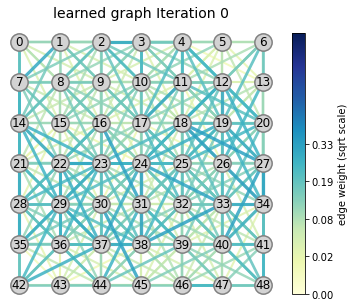

Iteration 1/15
tr(RL)= 48.0
tr(RL)= 47.999996185302734
  PGD Iter 1/10, tr(RL)= 48.0
  PGD Iter 2/10, tr(RL)= 48.0
  PGD Iter 3/10, tr(RL)= 47.999996185302734
  PGD Iter 4/10, tr(RL)= 47.999996185302734
  PGD Iter 5/10, tr(RL)= 48.000003814697266
  PGD Iter 6/10, tr(RL)= 48.0
  PGD Iter 7/10, tr(RL)= 48.000003814697266
  PGD Iter 8/10, tr(RL)= 48.0
  PGD Iter 9/10, tr(RL)= 48.0
  PGD Iter 10/10, tr(RL)= 48.000003814697266
A statistics: min= 0.8024948835372925 , max= 0.9054886102676392 , mean= 0.841824471950531
w_0 statistics: min= 0.026551976799964905 , max= 0.8559591770172119 , mean= 0.3486555516719818
w statistics: min= 0.009738259948790073 , max= 0.3116360306739807 , mean= 0.1275317370891571
left edges: 396 / 396


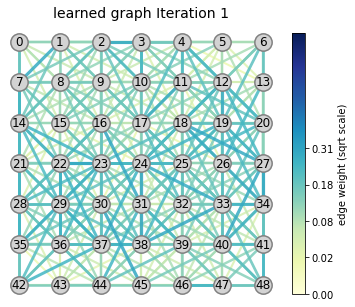

Iteration 2/15
tr(RL)= 47.999996185302734
tr(RL)= 48.000003814697266
  PGD Iter 1/10, tr(RL)= 48.0
  PGD Iter 2/10, tr(RL)= 48.0
  PGD Iter 3/10, tr(RL)= 48.000003814697266
  PGD Iter 4/10, tr(RL)= 48.000003814697266
  PGD Iter 5/10, tr(RL)= 48.0
  PGD Iter 6/10, tr(RL)= 48.0
  PGD Iter 7/10, tr(RL)= 48.0
  PGD Iter 8/10, tr(RL)= 48.000003814697266
  PGD Iter 9/10, tr(RL)= 48.0
  PGD Iter 10/10, tr(RL)= 48.0
A statistics: min= 0.5946502089500427 , max= 0.824543833732605 , mean= 0.6853097677230835
w_0 statistics: min= 0.021692190319299698 , max= 0.8483113050460815 , mean= 0.33399152755737305
w statistics: min= 0.008321788161993027 , max= 0.32726752758026123 , mean= 0.12739989161491394
left edges: 396 / 396


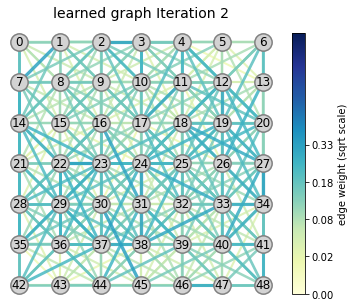

Iteration 3/15
tr(RL)= 48.000003814697266
tr(RL)= 48.0
  PGD Iter 1/10, tr(RL)= 48.000003814697266
  PGD Iter 2/10, tr(RL)= 48.000003814697266
  PGD Iter 3/10, tr(RL)= 48.000003814697266
  PGD Iter 4/10, tr(RL)= 48.000003814697266
  PGD Iter 5/10, tr(RL)= 48.00000762939453
  PGD Iter 6/10, tr(RL)= 48.0
  PGD Iter 7/10, tr(RL)= 48.00000762939453
  PGD Iter 8/10, tr(RL)= 48.00000762939453
  PGD Iter 9/10, tr(RL)= 48.0
  PGD Iter 10/10, tr(RL)= 48.0
A statistics: min= 0.3825325667858124 , max= 0.7547301054000854 , mean= 0.5306971669197083
w_0 statistics: min= 0.022040002048015594 , max= 0.849280834197998 , mean= 0.3354499936103821
w statistics: min= 0.008480379357933998 , max= 0.35457852482795715 , mean= 0.1281288117170334
left edges: 396 / 396


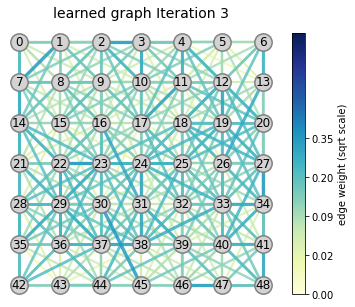

Iteration 4/15
tr(RL)= 48.0
tr(RL)= 47.999996185302734
  PGD Iter 1/10, tr(RL)= 47.999996185302734
  PGD Iter 2/10, tr(RL)= 48.0
  PGD Iter 3/10, tr(RL)= 48.0
  PGD Iter 4/10, tr(RL)= 48.0
  PGD Iter 5/10, tr(RL)= 48.0
  PGD Iter 6/10, tr(RL)= 48.0
  PGD Iter 7/10, tr(RL)= 47.999996185302734
  PGD Iter 8/10, tr(RL)= 48.0
  PGD Iter 9/10, tr(RL)= 47.999996185302734
  PGD Iter 10/10, tr(RL)= 48.0
A statistics: min= 0.16898654401302338 , max= 0.7003448009490967 , mean= 0.38077259063720703
w_0 statistics: min= 0.020652804523706436 , max= 0.8466510772705078 , mean= 0.33114492893218994
w statistics: min= 0.008034451864659786 , max= 0.4266146421432495 , mean= 0.12900803983211517
left edges: 396 / 396


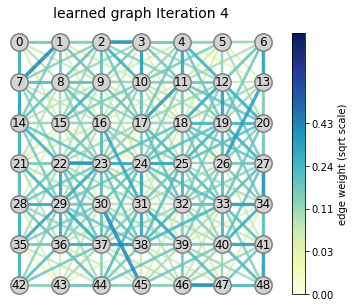

Iteration 5/15
tr(RL)= 48.0
tr(RL)= 47.999996185302734
  PGD Iter 1/10, tr(RL)= 48.0
  PGD Iter 2/10, tr(RL)= 48.0
  PGD Iter 3/10, tr(RL)= 47.999996185302734
  PGD Iter 4/10, tr(RL)= 47.99999237060547
  PGD Iter 5/10, tr(RL)= 47.999996185302734
  PGD Iter 6/10, tr(RL)= 48.0
  PGD Iter 7/10, tr(RL)= 48.000003814697266
  PGD Iter 8/10, tr(RL)= 48.0
  PGD Iter 9/10, tr(RL)= 47.999996185302734
  PGD Iter 10/10, tr(RL)= 47.99999237060547
A statistics: min= 0.0 , max= 0.662427544593811 , mean= 0.24397927522659302
w_0 statistics: min= 0.0194091796875 , max= 0.8434463739395142 , mean= 0.3272375166416168
w statistics: min= 0.0 , max= 0.5722282528877258 , mean= 0.12983527779579163
left edges: 394 / 396


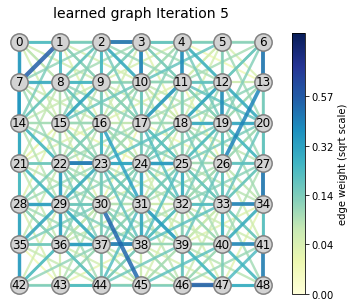

Iteration 6/15
tr(RL)= 47.99999237060547
tr(RL)= 47.999996185302734
  PGD Iter 1/10, tr(RL)= 47.999996185302734
  PGD Iter 2/10, tr(RL)= 47.9999885559082
  PGD Iter 3/10, tr(RL)= 47.99999237060547
  PGD Iter 4/10, tr(RL)= 47.99999237060547
  PGD Iter 5/10, tr(RL)= 47.999996185302734
  PGD Iter 6/10, tr(RL)= 48.0
  PGD Iter 7/10, tr(RL)= 48.0000114440918
  PGD Iter 8/10, tr(RL)= 47.999996185302734
  PGD Iter 9/10, tr(RL)= 47.999969482421875
  PGD Iter 10/10, tr(RL)= 47.99992752075195
A statistics: min= 0.0 , max= 0.6386211514472961 , mean= 0.1440076380968094
w_0 statistics: min= 0.019047008827328682 , max= 0.8386455774307251 , mean= 0.32597970962524414
w statistics: min= 0.0 , max= 0.7953433394432068 , mean= 0.12825605273246765
left edges: 376 / 396


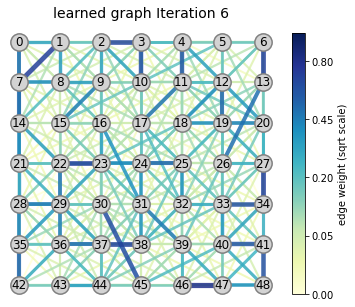

Iteration 7/15
tr(RL)= 48.00006866455078
tr(RL)= 48.00006866455078
  PGD Iter 1/10, tr(RL)= 47.999820709228516
  PGD Iter 2/10, tr(RL)= 47.999366760253906
  PGD Iter 3/10, tr(RL)= 47.998924255371094
  PGD Iter 4/10, tr(RL)= 47.99860763549805
  PGD Iter 5/10, tr(RL)= 47.998451232910156
  PGD Iter 6/10, tr(RL)= 47.9984016418457
  PGD Iter 7/10, tr(RL)= 47.99840545654297
  PGD Iter 8/10, tr(RL)= 47.99845886230469
  PGD Iter 9/10, tr(RL)= 47.998531341552734
  PGD Iter 10/10, tr(RL)= 47.99860382080078
A statistics: min= 0.0 , max= 0.6191454529762268 , mean= 0.09535824507474899
w_0 statistics: min= 0.022400878369808197 , max= 0.8367516994476318 , mean= 0.3359963893890381
w statistics: min= 0.0 , max= 0.9062511920928955 , mean= 0.1254255473613739
left edges: 264 / 396


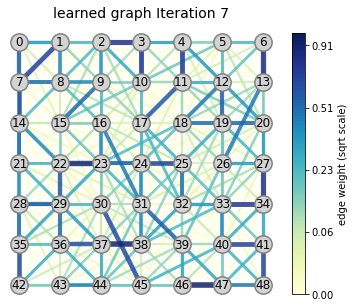

Iteration 8/15
tr(RL)= 47.99874496459961
tr(RL)= 47.99884796142578
  PGD Iter 1/10, tr(RL)= 47.99892807006836
  PGD Iter 2/10, tr(RL)= 47.99922561645508
  PGD Iter 3/10, tr(RL)= 47.99952697753906
  PGD Iter 4/10, tr(RL)= 47.999732971191406
  PGD Iter 5/10, tr(RL)= 47.99992370605469
  PGD Iter 6/10, tr(RL)= 48.000091552734375
  PGD Iter 7/10, tr(RL)= 48.000221252441406
  PGD Iter 8/10, tr(RL)= 48.00028991699219
  PGD Iter 9/10, tr(RL)= 48.00048065185547
  PGD Iter 10/10, tr(RL)= 48.000667572021484
A statistics: min= 0.0 , max= 0.6073753833770752 , mean= 0.07882504165172577
w_0 statistics: min= 0.025142155587673187 , max= 0.8353314399719238 , mean= 0.34241971373558044
w statistics: min= 0.0 , max= 1.0139567852020264 , mean= 0.12398329377174377
left edges: 210 / 396


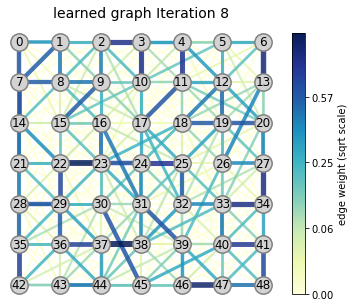

Iteration 9/15
tr(RL)= 48.00068664550781
tr(RL)= 48.000732421875
  PGD Iter 1/10, tr(RL)= 48.00215530395508
  PGD Iter 2/10, tr(RL)= 48.00276184082031
  PGD Iter 3/10, tr(RL)= 48.00316619873047
  PGD Iter 4/10, tr(RL)= 48.00347900390625
  PGD Iter 5/10, tr(RL)= 48.00370788574219
  PGD Iter 6/10, tr(RL)= 48.003849029541016
  PGD Iter 7/10, tr(RL)= 48.00395202636719
  PGD Iter 8/10, tr(RL)= 48.00413513183594
  PGD Iter 9/10, tr(RL)= 48.00434494018555
  PGD Iter 10/10, tr(RL)= 48.00454330444336
A statistics: min= 0.0 , max= 0.6026831865310669 , mean= 0.07100629061460495
w_0 statistics: min= 0.025578884407877922 , max= 0.8327057361602783 , mean= 0.34231793880462646
w statistics: min= 0.0 , max= 1.0633161067962646 , mean= 0.12316063046455383
left edges: 185 / 396


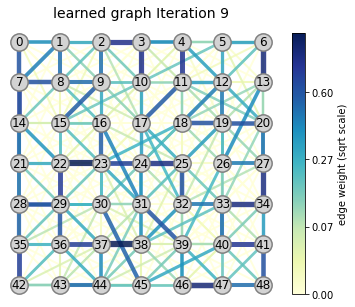

Iteration 10/15
tr(RL)= 48.00454330444336
tr(RL)= 48.004520416259766
  PGD Iter 1/10, tr(RL)= 48.00595474243164
  PGD Iter 2/10, tr(RL)= 48.00663757324219
  PGD Iter 3/10, tr(RL)= 48.006778717041016
  PGD Iter 4/10, tr(RL)= 48.00694274902344
  PGD Iter 5/10, tr(RL)= 48.007083892822266
  PGD Iter 6/10, tr(RL)= 48.00721740722656
  PGD Iter 7/10, tr(RL)= 48.00734329223633
  PGD Iter 8/10, tr(RL)= 48.00747299194336
  PGD Iter 9/10, tr(RL)= 48.007591247558594
  PGD Iter 10/10, tr(RL)= 48.0077018737793
A statistics: min= 0.0 , max= 0.5991252064704895 , mean= 0.06674814969301224
w_0 statistics: min= 0.02597542107105255 , max= 0.8315223455429077 , mean= 0.34311413764953613
w statistics: min= 0.0 , max= 1.0767405033111572 , mean= 0.12271714210510254
left edges: 165 / 396


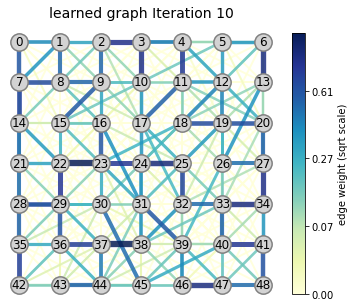

Iteration 11/15
tr(RL)= 48.007713317871094
tr(RL)= 48.00778579711914
  PGD Iter 1/10, tr(RL)= 48.009159088134766
  PGD Iter 2/10, tr(RL)= 48.00948715209961
  PGD Iter 3/10, tr(RL)= 48.00946044921875
  PGD Iter 4/10, tr(RL)= 48.00956726074219
  PGD Iter 5/10, tr(RL)= 48.00960922241211
  PGD Iter 6/10, tr(RL)= 48.00969314575195
  PGD Iter 7/10, tr(RL)= 48.009742736816406
  PGD Iter 8/10, tr(RL)= 48.009788513183594
  PGD Iter 9/10, tr(RL)= 48.009830474853516
  PGD Iter 10/10, tr(RL)= 48.009857177734375
A statistics: min= 0.0 , max= 0.5977123975753784 , mean= 0.06412883847951889
w_0 statistics: min= 0.02426576428115368 , max= 0.8291611671447754 , mean= 0.33795273303985596
w statistics: min= 0.0 , max= 1.0854132175445557 , mean= 0.1224096491932869
left edges: 159 / 396


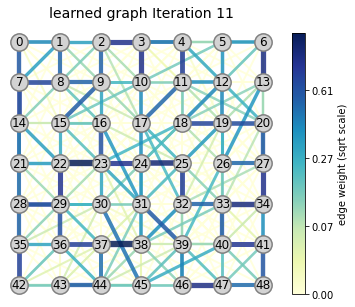

Iteration 12/15
tr(RL)= 48.009864807128906
tr(RL)= 48.00975036621094
  PGD Iter 1/10, tr(RL)= 48.0108528137207
  PGD Iter 2/10, tr(RL)= 48.01103591918945
  PGD Iter 3/10, tr(RL)= 48.01089859008789
  PGD Iter 4/10, tr(RL)= 48.01103591918945
  PGD Iter 5/10, tr(RL)= 48.01100158691406
  PGD Iter 6/10, tr(RL)= 48.0110969543457
  PGD Iter 7/10, tr(RL)= 48.01110076904297
  PGD Iter 8/10, tr(RL)= 48.01116180419922
  PGD Iter 9/10, tr(RL)= 48.01118087768555
  PGD Iter 10/10, tr(RL)= 48.01123046875
A statistics: min= 0.0 , max= 0.5929017663002014 , mean= 0.06229674071073532
w_0 statistics: min= 0.024752546101808548 , max= 0.8288843631744385 , mean= 0.33926302194595337
w statistics: min= 0.0 , max= 1.0772289037704468 , mean= 0.12229292094707489
left edges: 156 / 396


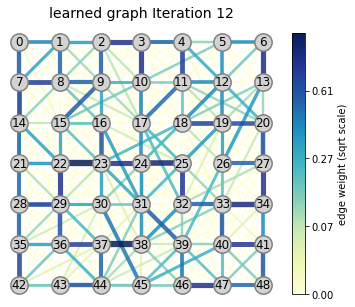

Iteration 13/15
tr(RL)= 48.011226654052734
tr(RL)= 48.01130294799805
  PGD Iter 1/10, tr(RL)= 48.01238250732422
  PGD Iter 2/10, tr(RL)= 48.012447357177734
  PGD Iter 3/10, tr(RL)= 48.01226043701172
  PGD Iter 4/10, tr(RL)= 48.01240158081055
  PGD Iter 5/10, tr(RL)= 48.01226806640625
  PGD Iter 6/10, tr(RL)= 48.01237869262695
  PGD Iter 7/10, tr(RL)= 48.01228713989258
  PGD Iter 8/10, tr(RL)= 48.01237487792969
  PGD Iter 9/10, tr(RL)= 48.01231002807617
  PGD Iter 10/10, tr(RL)= 48.012367248535156
A statistics: min= 0.0 , max= 0.5880187153816223 , mean= 0.06101708859205246
w_0 statistics: min= 0.02458486706018448 , max= 0.828201949596405 , mean= 0.33848831057548523
w statistics: min= 0.0 , max= 1.0675156116485596 , mean= 0.12222945690155029
left edges: 155 / 396


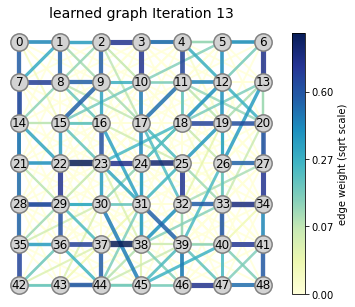

Iteration 14/15
tr(RL)= 48.012359619140625
tr(RL)= 48.01232147216797
  PGD Iter 1/10, tr(RL)= 48.01301574707031
  PGD Iter 2/10, tr(RL)= 48.013038635253906
  PGD Iter 3/10, tr(RL)= 48.01278305053711
  PGD Iter 4/10, tr(RL)= 48.01294708251953
  PGD Iter 5/10, tr(RL)= 48.01272201538086
  PGD Iter 6/10, tr(RL)= 48.01289367675781
  PGD Iter 7/10, tr(RL)= 48.012699127197266
  PGD Iter 8/10, tr(RL)= 48.01286697387695
  PGD Iter 9/10, tr(RL)= 48.01268768310547
  PGD Iter 10/10, tr(RL)= 48.012847900390625
A statistics: min= 0.0 , max= 0.5818448662757874 , mean= 0.060102593153715134
w_0 statistics: min= 0.02436702698469162 , max= 0.8272676467895508 , mean= 0.3382836878299713
w statistics: min= 0.0 , max= 1.0632070302963257 , mean= 0.12222963571548462
left edges: 155 / 396


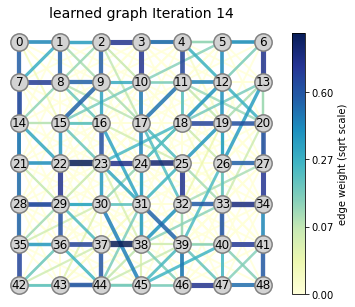

Iteration 15/15
tr(RL)= 48.012840270996094
tr(RL)= 48.01284408569336
  PGD Iter 1/10, tr(RL)= 48.01316833496094
  PGD Iter 2/10, tr(RL)= 48.013221740722656
  PGD Iter 3/10, tr(RL)= 48.012855529785156
  PGD Iter 4/10, tr(RL)= 48.013099670410156
  PGD Iter 5/10, tr(RL)= 48.012760162353516
  PGD Iter 6/10, tr(RL)= 48.013023376464844
  PGD Iter 7/10, tr(RL)= 48.01268768310547
  PGD Iter 8/10, tr(RL)= 48.01295852661133
  PGD Iter 9/10, tr(RL)= 48.01262664794922
  PGD Iter 10/10, tr(RL)= 48.01291275024414
A statistics: min= 0.0 , max= 0.5761764645576477 , mean= 0.05948372185230255
w_0 statistics: min= 0.02418326586484909 , max= 0.8265097737312317 , mean= 0.33798325061798096
w statistics: min= 0.0 , max= 1.0596994161605835 , mean= 0.1222710832953453
left edges: 157 / 396


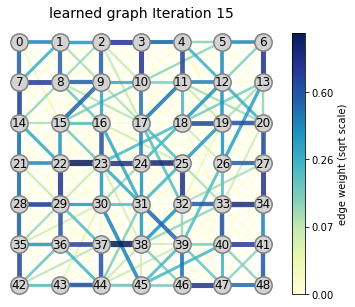

In [4]:
arg_dict = {
    'mu': 0.15,
    'gamma': 0.4,
    'step_size': 0.005,
    'PGD_step_size': 0.04,
    'c': 16,
    'PGD_iters': 10,
    'GEM_iters': 15,
    'method': 'CG',
    'inv_method': 'L+J',
}

x, w_0, A, w, A_sparsemax = Experiment(arg_dict, num_nodes)


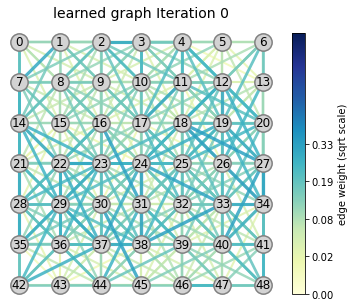

Iteration 1/15
tr(RL)= 47.828678131103516
tr(RL)= 47.842185974121094
  PGD Iter 1/10, tr(RL)= 47.839630126953125
  PGD Iter 2/10, tr(RL)= 47.837013244628906
  PGD Iter 3/10, tr(RL)= 47.83432388305664
  PGD Iter 4/10, tr(RL)= 47.83156204223633
  PGD Iter 5/10, tr(RL)= 47.8287353515625
  PGD Iter 6/10, tr(RL)= 47.82581329345703
  PGD Iter 7/10, tr(RL)= 47.82282257080078
  PGD Iter 8/10, tr(RL)= 47.81975173950195
  PGD Iter 9/10, tr(RL)= 47.81659698486328
  PGD Iter 10/10, tr(RL)= 47.81334686279297
A statistics: min= 0.8021604418754578 , max= 0.9049111008644104 , mean= 0.8416610360145569
w_0 statistics: min= 0.026319559663534164 , max= 0.8557265996932983 , mean= 0.34804773330688477
w statistics: min= 0.009669783525168896 , max= 0.3120381236076355 , mean= 0.1275058537721634
left edges: 396 / 396


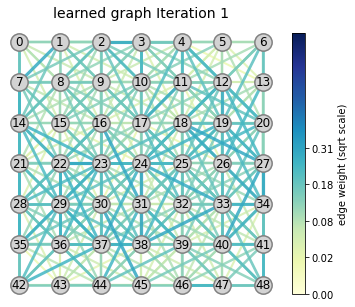

Iteration 2/15
tr(RL)= 47.8435173034668
tr(RL)= 47.83973693847656
  PGD Iter 1/10, tr(RL)= 47.836666107177734
  PGD Iter 2/10, tr(RL)= 47.83351135253906
  PGD Iter 3/10, tr(RL)= 47.83024978637695
  PGD Iter 4/10, tr(RL)= 47.82689666748047
  PGD Iter 5/10, tr(RL)= 47.82344436645508
  PGD Iter 6/10, tr(RL)= 47.81988525390625
  PGD Iter 7/10, tr(RL)= 47.81622314453125
  PGD Iter 8/10, tr(RL)= 47.812442779541016
  PGD Iter 9/10, tr(RL)= 47.80854797363281
  PGD Iter 10/10, tr(RL)= 47.804534912109375
A statistics: min= 0.5939819812774658 , max= 0.822657585144043 , mean= 0.6849337220191956
w_0 statistics: min= 0.021622277796268463 , max= 0.848274290561676 , mean= 0.3338225781917572
w statistics: min= 0.008302787318825722 , max= 0.32702144980430603 , mean= 0.12738685309886932
left edges: 396 / 396


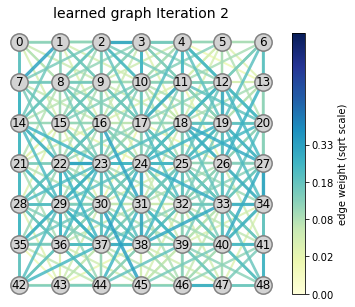

Iteration 3/15
tr(RL)= 47.84185791015625
tr(RL)= 47.84226989746094
  PGD Iter 1/10, tr(RL)= 47.8385009765625
  PGD Iter 2/10, tr(RL)= 47.83460998535156
  PGD Iter 3/10, tr(RL)= 47.830570220947266
  PGD Iter 4/10, tr(RL)= 47.826393127441406
  PGD Iter 5/10, tr(RL)= 47.82207107543945
  PGD Iter 6/10, tr(RL)= 47.81758117675781
  PGD Iter 7/10, tr(RL)= 47.81294631958008
  PGD Iter 8/10, tr(RL)= 47.80815887451172
  PGD Iter 9/10, tr(RL)= 47.80320358276367
  PGD Iter 10/10, tr(RL)= 47.7980842590332
A statistics: min= 0.38136619329452515 , max= 0.7518123388290405 , mean= 0.5300762057304382
w_0 statistics: min= 0.021931737661361694 , max= 0.8491698503494263 , mean= 0.33514925837516785
w statistics: min= 0.008454807102680206 , max= 0.35417717695236206 , mean= 0.12810738384723663
left edges: 396 / 396


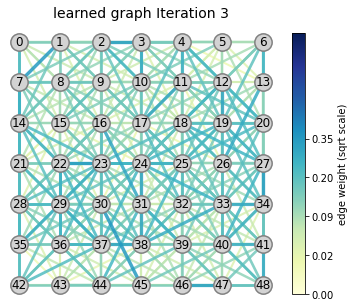

Iteration 4/15
tr(RL)= 47.845176696777344
tr(RL)= 47.84412384033203
  PGD Iter 1/10, tr(RL)= 47.839176177978516
  PGD Iter 2/10, tr(RL)= 47.834007263183594
  PGD Iter 3/10, tr(RL)= 47.82862091064453
  PGD Iter 4/10, tr(RL)= 47.82301330566406
  PGD Iter 5/10, tr(RL)= 47.81716537475586
  PGD Iter 6/10, tr(RL)= 47.811092376708984
  PGD Iter 7/10, tr(RL)= 47.80480194091797
  PGD Iter 8/10, tr(RL)= 47.79829025268555
  PGD Iter 9/10, tr(RL)= 47.79157638549805
  PGD Iter 10/10, tr(RL)= 47.78463363647461
A statistics: min= 0.16716676950454712 , max= 0.6964684128761292 , mean= 0.37985527515411377
w_0 statistics: min= 0.02057599648833275 , max= 0.8465863466262817 , mean= 0.33093178272247314
w statistics: min= 0.008027948439121246 , max= 0.4265194833278656 , mean= 0.12898610532283783
left edges: 396 / 396


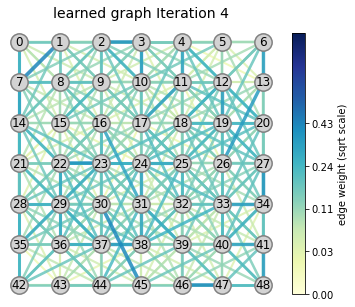

Iteration 5/15
tr(RL)= 47.84761428833008
tr(RL)= 47.8466796875
  PGD Iter 1/10, tr(RL)= 47.83934783935547
  PGD Iter 2/10, tr(RL)= 47.831607818603516
  PGD Iter 3/10, tr(RL)= 47.823482513427734
  PGD Iter 4/10, tr(RL)= 47.814971923828125
  PGD Iter 5/10, tr(RL)= 47.80612564086914
  PGD Iter 6/10, tr(RL)= 47.797000885009766
  PGD Iter 7/10, tr(RL)= 47.78767395019531
  PGD Iter 8/10, tr(RL)= 47.77822494506836
  PGD Iter 9/10, tr(RL)= 47.76884460449219
  PGD Iter 10/10, tr(RL)= 47.759586334228516
A statistics: min= 0.0 , max= 0.6579110622406006 , mean= 0.242781400680542
w_0 statistics: min= 0.019336264580488205 , max= 0.8433794975280762 , mean= 0.3270139992237091
w statistics: min= 0.0 , max= 0.5733591318130493 , mean= 0.12980441749095917
left edges: 394 / 396


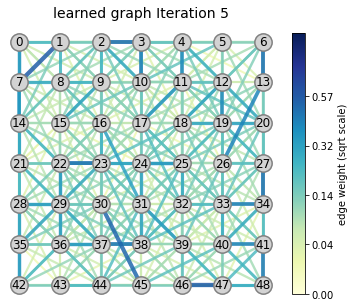

Iteration 6/15
tr(RL)= 47.84544372558594
tr(RL)= 47.84493637084961
  PGD Iter 1/10, tr(RL)= 47.83068084716797
  PGD Iter 2/10, tr(RL)= 47.815738677978516
  PGD Iter 3/10, tr(RL)= 47.800987243652344
  PGD Iter 4/10, tr(RL)= 47.78772735595703
  PGD Iter 5/10, tr(RL)= 47.7769889831543
  PGD Iter 6/10, tr(RL)= 47.769500732421875
  PGD Iter 7/10, tr(RL)= 47.761680603027344
  PGD Iter 8/10, tr(RL)= 47.754913330078125
  PGD Iter 9/10, tr(RL)= 47.74758529663086
  PGD Iter 10/10, tr(RL)= 47.74232864379883
A statistics: min= 0.0 , max= 0.6339917182922363 , mean= 0.14278654754161835
w_0 statistics: min= 0.018980536609888077 , max= 0.8385704755783081 , mean= 0.32575926184654236
w statistics: min= 0.0 , max= 0.7981171607971191 , mean= 0.12817956507205963
left edges: 375 / 396


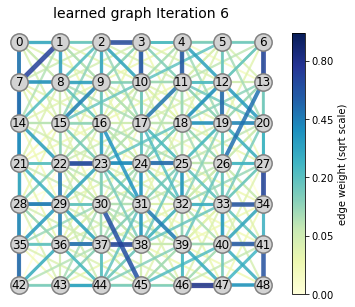

Iteration 7/15
tr(RL)= 47.82991027832031
tr(RL)= 47.831321716308594
  PGD Iter 1/10, tr(RL)= 47.80549240112305
  PGD Iter 2/10, tr(RL)= 47.78600311279297
  PGD Iter 3/10, tr(RL)= 47.77253723144531
  PGD Iter 4/10, tr(RL)= 47.76334762573242
  PGD Iter 5/10, tr(RL)= 47.757774353027344
  PGD Iter 6/10, tr(RL)= 47.754432678222656
  PGD Iter 7/10, tr(RL)= 47.75247573852539
  PGD Iter 8/10, tr(RL)= 47.75121307373047
  PGD Iter 9/10, tr(RL)= 47.7503776550293
  PGD Iter 10/10, tr(RL)= 47.74977111816406
A statistics: min= 0.0 , max= 0.6147346496582031 , mean= 0.09441705048084259
w_0 statistics: min= 0.022400328889489174 , max= 0.8367712497711182 , mean= 0.3359234035015106
w statistics: min= 0.0 , max= 0.9090688228607178 , mean= 0.12532715499401093
left edges: 262 / 396


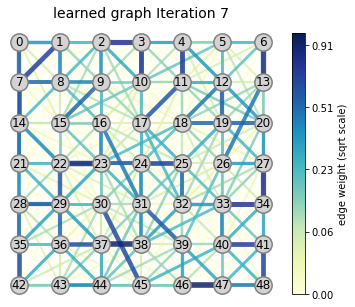

Iteration 8/15
tr(RL)= 47.80293655395508
tr(RL)= 47.80396270751953
  PGD Iter 1/10, tr(RL)= 47.78293228149414
  PGD Iter 2/10, tr(RL)= 47.772674560546875
  PGD Iter 3/10, tr(RL)= 47.767601013183594
  PGD Iter 4/10, tr(RL)= 47.7650032043457
  PGD Iter 5/10, tr(RL)= 47.76369094848633
  PGD Iter 6/10, tr(RL)= 47.76292419433594
  PGD Iter 7/10, tr(RL)= 47.76239013671875
  PGD Iter 8/10, tr(RL)= 47.76216506958008
  PGD Iter 9/10, tr(RL)= 47.76211929321289
  PGD Iter 10/10, tr(RL)= 47.76211166381836
A statistics: min= 0.0 , max= 0.6033145785331726 , mean= 0.07801400125026703
w_0 statistics: min= 0.025125205516815186 , max= 0.8352335691452026 , mean= 0.3423410952091217
w statistics: min= 0.0 , max= 1.018023133277893 , mean= 0.12388283014297485
left edges: 207 / 396


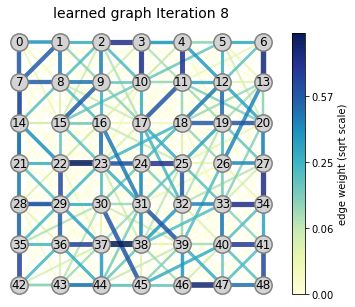

Iteration 9/15
tr(RL)= 47.794124603271484
tr(RL)= 47.79416275024414
  PGD Iter 1/10, tr(RL)= 47.778961181640625
  PGD Iter 2/10, tr(RL)= 47.77392578125
  PGD Iter 3/10, tr(RL)= 47.77217483520508
  PGD Iter 4/10, tr(RL)= 47.77151870727539
  PGD Iter 5/10, tr(RL)= 47.77128982543945
  PGD Iter 6/10, tr(RL)= 47.77124786376953
  PGD Iter 7/10, tr(RL)= 47.771278381347656
  PGD Iter 8/10, tr(RL)= 47.771392822265625
  PGD Iter 9/10, tr(RL)= 47.77153015136719
  PGD Iter 10/10, tr(RL)= 47.771705627441406
A statistics: min= 0.0 , max= 0.5987809896469116 , mean= 0.07027928531169891
w_0 statistics: min= 0.025506429374217987 , max= 0.8326643705368042 , mean= 0.3421297073364258
w statistics: min= 0.0 , max= 1.0657488107681274 , mean= 0.12305998802185059
left edges: 183 / 396


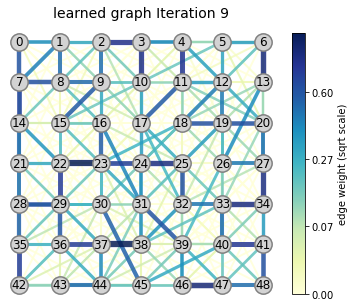

Iteration 10/15
tr(RL)= 47.792808532714844
tr(RL)= 47.79292678833008
  PGD Iter 1/10, tr(RL)= 47.7809944152832
  PGD Iter 2/10, tr(RL)= 47.779449462890625
  PGD Iter 3/10, tr(RL)= 47.778377532958984
  PGD Iter 4/10, tr(RL)= 47.77836227416992
  PGD Iter 5/10, tr(RL)= 47.77829360961914
  PGD Iter 6/10, tr(RL)= 47.77837371826172
  PGD Iter 7/10, tr(RL)= 47.778465270996094
  PGD Iter 8/10, tr(RL)= 47.778568267822266
  PGD Iter 9/10, tr(RL)= 47.77867126464844
  PGD Iter 10/10, tr(RL)= 47.778770446777344
A statistics: min= 0.0 , max= 0.5950654745101929 , mean= 0.06604301929473877
w_0 statistics: min= 0.02596927434206009 , max= 0.8314622640609741 , mean= 0.3430648446083069
w statistics: min= 0.0 , max= 1.0833559036254883 , mean= 0.12261994928121567
left edges: 164 / 396


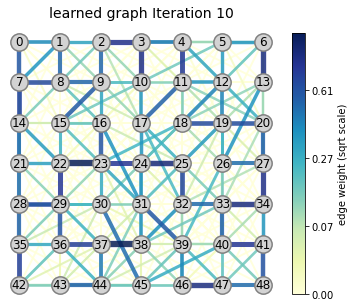

Iteration 11/15
tr(RL)= 47.79356384277344
tr(RL)= 47.793087005615234
  PGD Iter 1/10, tr(RL)= 47.78398513793945
  PGD Iter 2/10, tr(RL)= 47.78414535522461
  PGD Iter 3/10, tr(RL)= 47.78276824951172
  PGD Iter 4/10, tr(RL)= 47.78319549560547
  PGD Iter 5/10, tr(RL)= 47.782772064208984
  PGD Iter 6/10, tr(RL)= 47.782958984375
  PGD Iter 7/10, tr(RL)= 47.7828254699707
  PGD Iter 8/10, tr(RL)= 47.78290939331055
  PGD Iter 9/10, tr(RL)= 47.782867431640625
  PGD Iter 10/10, tr(RL)= 47.78290939331055
A statistics: min= 0.0 , max= 0.5938522815704346 , mean= 0.06343737244606018
w_0 statistics: min= 0.024233296513557434 , max= 0.8291100263595581 , mean= 0.3377743363380432
w statistics: min= 0.0 , max= 1.0891362428665161 , mean= 0.1223144456744194
left edges: 158 / 396


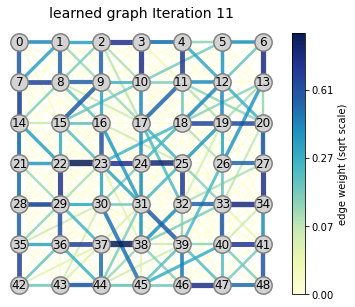

Iteration 12/15
tr(RL)= 47.7938232421875
tr(RL)= 47.79387283325195
  PGD Iter 1/10, tr(RL)= 47.786216735839844
  PGD Iter 2/10, tr(RL)= 47.78718948364258
  PGD Iter 3/10, tr(RL)= 47.78547668457031
  PGD Iter 4/10, tr(RL)= 47.78644943237305
  PGD Iter 5/10, tr(RL)= 47.78554153442383
  PGD Iter 6/10, tr(RL)= 47.78619384765625
  PGD Iter 7/10, tr(RL)= 47.78568649291992
  PGD Iter 8/10, tr(RL)= 47.78609085083008
  PGD Iter 9/10, tr(RL)= 47.78581619262695
  PGD Iter 10/10, tr(RL)= 47.78606414794922
A statistics: min= 0.0 , max= 0.5887781381607056 , mean= 0.0616149939596653
w_0 statistics: min= 0.024686437100172043 , max= 0.8287057876586914 , mean= 0.33904823660850525
w statistics: min= 0.0 , max= 1.0799723863601685 , mean= 0.1221999078989029
left edges: 155 / 396


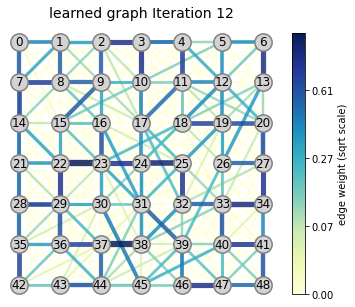

Iteration 13/15
tr(RL)= 47.79426193237305
tr(RL)= 47.79425048828125
  PGD Iter 1/10, tr(RL)= 47.78797149658203
  PGD Iter 2/10, tr(RL)= 47.789520263671875
  PGD Iter 3/10, tr(RL)= 47.78740310668945
  PGD Iter 4/10, tr(RL)= 47.788944244384766
  PGD Iter 5/10, tr(RL)= 47.78731918334961
  PGD Iter 6/10, tr(RL)= 47.78870391845703
  PGD Iter 7/10, tr(RL)= 47.78734588623047
  PGD Iter 8/10, tr(RL)= 47.788551330566406
  PGD Iter 9/10, tr(RL)= 47.78740692138672
  PGD Iter 10/10, tr(RL)= 47.788429260253906
A statistics: min= 0.0 , max= 0.5837162137031555 , mean= 0.06034916266798973
w_0 statistics: min= 0.02450813353061676 , max= 0.8279855847358704 , mean= 0.33825549483299255
w statistics: min= 0.0 , max= 1.0681462287902832 , mean= 0.12214776128530502
left edges: 154 / 396


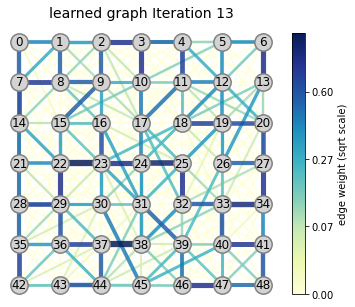

Iteration 14/15
tr(RL)= 47.79471969604492
tr(RL)= 47.79466247558594
  PGD Iter 1/10, tr(RL)= 47.788639068603516
  PGD Iter 2/10, tr(RL)= 47.790870666503906
  PGD Iter 3/10, tr(RL)= 47.78811264038086
  PGD Iter 4/10, tr(RL)= 47.79045486450195
  PGD Iter 5/10, tr(RL)= 47.78792190551758
  PGD Iter 6/10, tr(RL)= 47.790348052978516
  PGD Iter 7/10, tr(RL)= 47.78781509399414
  PGD Iter 8/10, tr(RL)= 47.790306091308594
  PGD Iter 9/10, tr(RL)= 47.787757873535156
  PGD Iter 10/10, tr(RL)= 47.79030227661133
A statistics: min= 0.0 , max= 0.5774632692337036 , mean= 0.05945136025547981
w_0 statistics: min= 0.02421330288052559 , max= 0.8269801735877991 , mean= 0.33793744444847107
w statistics: min= 0.0 , max= 1.0629698038101196 , mean= 0.12215690314769745
left edges: 154 / 396


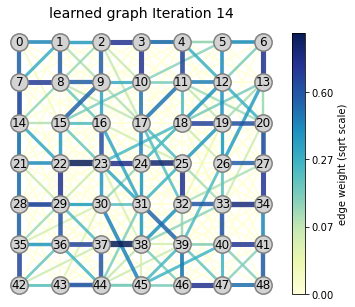

Iteration 15/15
tr(RL)= 47.79499053955078
tr(RL)= 47.794921875
  PGD Iter 1/10, tr(RL)= 47.788551330566406
  PGD Iter 2/10, tr(RL)= 47.79203796386719
  PGD Iter 3/10, tr(RL)= 47.788089752197266
  PGD Iter 4/10, tr(RL)= 47.79176330566406
  PGD Iter 5/10, tr(RL)= 47.787841796875
  PGD Iter 6/10, tr(RL)= 47.791725158691406
  PGD Iter 7/10, tr(RL)= 47.78764724731445
  PGD Iter 8/10, tr(RL)= 47.79177474975586
  PGD Iter 9/10, tr(RL)= 47.7874755859375
  PGD Iter 10/10, tr(RL)= 47.79182815551758
A statistics: min= 0.0 , max= 0.5706363916397095 , mean= 0.05884839594364166
w_0 statistics: min= 0.024328283965587616 , max= 0.8260303735733032 , mean= 0.3378920257091522
w statistics: min= 0.0 , max= 1.0595088005065918 , mean= 0.12220767885446548
left edges: 160 / 396


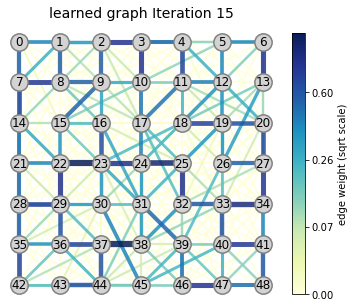

In [5]:
arg_dict = {
    'mu': 0.15,
    'gamma': 0.4,
    'step_size': 0.005,
    'PGD_step_size': 0.04,
    'c': 16,
    'PGD_iters': 10,
    'GEM_iters': 15,
    'method': 'CG',
    'inv_method': 'L+eI',
}

x, w_0, A, w, A_sparsemax = Experiment(arg_dict, num_nodes)

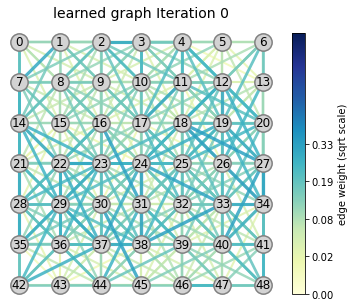

Iteration 1/15
tr(RL)= 47.82857894897461
tr(RL)= 47.84217071533203
  PGD Iter 1/10, tr(RL)= 47.83961868286133
  PGD Iter 2/10, tr(RL)= 47.83700180053711
  PGD Iter 3/10, tr(RL)= 47.834312438964844
  PGD Iter 4/10, tr(RL)= 47.83155059814453
  PGD Iter 5/10, tr(RL)= 47.82871627807617
  PGD Iter 6/10, tr(RL)= 47.8258056640625
  PGD Iter 7/10, tr(RL)= 47.82281494140625
  PGD Iter 8/10, tr(RL)= 47.81974411010742
  PGD Iter 9/10, tr(RL)= 47.81658172607422
  PGD Iter 10/10, tr(RL)= 47.81334686279297
A statistics: min= 0.8021605014801025 , max= 0.9049112796783447 , mean= 0.8416610360145569
w_0 statistics: min= 0.02631957456469536 , max= 0.8557265400886536 , mean= 0.34804755449295044
w statistics: min= 0.009669792838394642 , max= 0.3120381832122803 , mean= 0.1275058537721634
left edges: 396 / 396


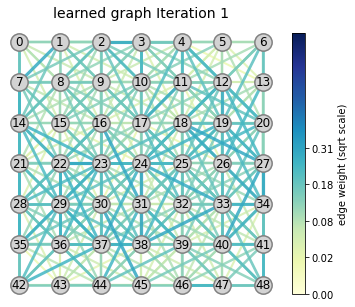

Iteration 2/15
tr(RL)= 47.843505859375
tr(RL)= 47.84012985229492
  PGD Iter 1/10, tr(RL)= 47.837066650390625
  PGD Iter 2/10, tr(RL)= 47.833919525146484
  PGD Iter 3/10, tr(RL)= 47.83067321777344
  PGD Iter 4/10, tr(RL)= 47.827327728271484
  PGD Iter 5/10, tr(RL)= 47.82388687133789
  PGD Iter 6/10, tr(RL)= 47.8203239440918
  PGD Iter 7/10, tr(RL)= 47.81666564941406
  PGD Iter 8/10, tr(RL)= 47.812904357910156
  PGD Iter 9/10, tr(RL)= 47.80901336669922
  PGD Iter 10/10, tr(RL)= 47.80501174926758
A statistics: min= 0.594186544418335 , max= 0.8223643898963928 , mean= 0.6848925948143005
w_0 statistics: min= 0.02204832434654236 , max= 0.8488441705703735 , mean= 0.33501288294792175
w statistics: min= 0.008440086618065834 , max= 0.326071560382843 , mean= 0.1274416744709015
left edges: 396 / 396


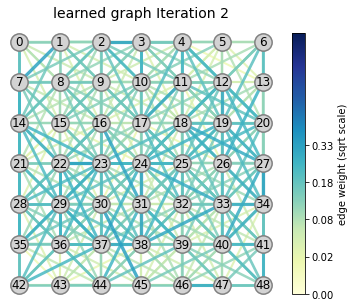

Iteration 3/15
tr(RL)= 47.842247009277344
tr(RL)= 47.84320068359375
  PGD Iter 1/10, tr(RL)= 47.839454650878906
  PGD Iter 2/10, tr(RL)= 47.835575103759766
  PGD Iter 3/10, tr(RL)= 47.83155822753906
  PGD Iter 4/10, tr(RL)= 47.827396392822266
  PGD Iter 5/10, tr(RL)= 47.823089599609375
  PGD Iter 6/10, tr(RL)= 47.81863021850586
  PGD Iter 7/10, tr(RL)= 47.81401443481445
  PGD Iter 8/10, tr(RL)= 47.809242248535156
  PGD Iter 9/10, tr(RL)= 47.8043098449707
  PGD Iter 10/10, tr(RL)= 47.799198150634766
A statistics: min= 0.38204479217529297 , max= 0.7500497698783875 , mean= 0.5299303531646729
w_0 statistics: min= 0.022977177053689957 , max= 0.8504769802093506 , mean= 0.33801519870758057
w statistics: min= 0.008792133070528507 , max= 0.3512730598449707 , mean= 0.12823116779327393
left edges: 396 / 396


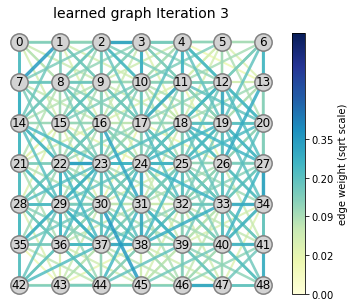

Iteration 4/15
tr(RL)= 47.846073150634766
tr(RL)= 47.845703125
  PGD Iter 1/10, tr(RL)= 47.84079360961914
  PGD Iter 2/10, tr(RL)= 47.835670471191406
  PGD Iter 3/10, tr(RL)= 47.830322265625
  PGD Iter 4/10, tr(RL)= 47.82475662231445
  PGD Iter 5/10, tr(RL)= 47.81895446777344
  PGD Iter 6/10, tr(RL)= 47.81292724609375
  PGD Iter 7/10, tr(RL)= 47.806671142578125
  PGD Iter 8/10, tr(RL)= 47.800193786621094
  PGD Iter 9/10, tr(RL)= 47.79349899291992
  PGD Iter 10/10, tr(RL)= 47.786598205566406
A statistics: min= 0.1685890257358551 , max= 0.6923476457595825 , mean= 0.3795153796672821
w_0 statistics: min= 0.022358059883117676 , max= 0.8488650918006897 , mean= 0.33582189679145813
w statistics: min= 0.008613813668489456 , max= 0.42072683572769165 , mean= 0.1291789412498474
left edges: 396 / 396


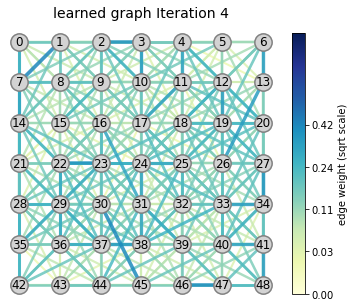

Iteration 5/15
tr(RL)= 47.84919738769531
tr(RL)= 47.84910583496094
  PGD Iter 1/10, tr(RL)= 47.841819763183594
  PGD Iter 2/10, tr(RL)= 47.834129333496094
  PGD Iter 3/10, tr(RL)= 47.82603073120117
  PGD Iter 4/10, tr(RL)= 47.817569732666016
  PGD Iter 5/10, tr(RL)= 47.80878829956055
  PGD Iter 6/10, tr(RL)= 47.79974365234375
  PGD Iter 7/10, tr(RL)= 47.79050827026367
  PGD Iter 8/10, tr(RL)= 47.78120040893555
  PGD Iter 9/10, tr(RL)= 47.77201461791992
  PGD Iter 10/10, tr(RL)= 47.763004302978516
A statistics: min= 0.0 , max= 0.6498153209686279 , mean= 0.2421083152294159
w_0 statistics: min= 0.022078588604927063 , max= 0.8469523191452026 , mean= 0.334598571062088
w statistics: min= 0.0 , max= 0.5626710653305054 , mean= 0.13007061183452606
left edges: 394 / 396


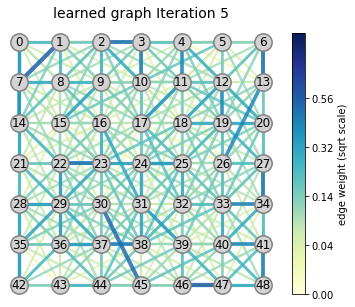

Iteration 6/15
tr(RL)= 47.84904861450195
tr(RL)= 47.84911346435547
  PGD Iter 1/10, tr(RL)= 47.83548355102539
  PGD Iter 2/10, tr(RL)= 47.8215446472168
  PGD Iter 3/10, tr(RL)= 47.80805587768555
  PGD Iter 4/10, tr(RL)= 47.79512405395508
  PGD Iter 5/10, tr(RL)= 47.78321838378906
  PGD Iter 6/10, tr(RL)= 47.77264404296875
  PGD Iter 7/10, tr(RL)= 47.763553619384766
  PGD Iter 8/10, tr(RL)= 47.75584411621094
  PGD Iter 9/10, tr(RL)= 47.7493896484375
  PGD Iter 10/10, tr(RL)= 47.74403381347656
A statistics: min= 0.0 , max= 0.6205231547355652 , mean= 0.14209029078483582
w_0 statistics: min= 0.02265908196568489 , max= 0.8426899909973145 , mean= 0.33581018447875977
w statistics: min= 0.0 , max= 0.7831834554672241 , mean= 0.12851133942604065
left edges: 375 / 396


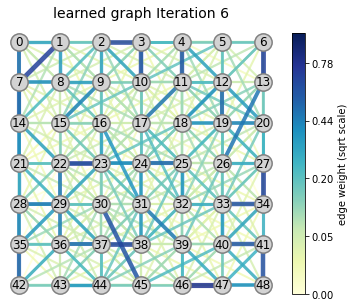

Iteration 7/15
tr(RL)= 47.83217239379883
tr(RL)= 47.835899353027344
  PGD Iter 1/10, tr(RL)= 47.811710357666016
  PGD Iter 2/10, tr(RL)= 47.792869567871094
  PGD Iter 3/10, tr(RL)= 47.77922821044922
  PGD Iter 4/10, tr(RL)= 47.76995086669922
  PGD Iter 5/10, tr(RL)= 47.764225006103516
  PGD Iter 6/10, tr(RL)= 47.761051177978516
  PGD Iter 7/10, tr(RL)= 47.75929260253906
  PGD Iter 8/10, tr(RL)= 47.758155822753906
  PGD Iter 9/10, tr(RL)= 47.75743103027344
  PGD Iter 10/10, tr(RL)= 47.756893157958984
A statistics: min= 0.0 , max= 0.5844878554344177 , mean= 0.0943518728017807
w_0 statistics: min= 0.03347943723201752 , max= 0.8460446000099182 , mean= 0.36406847834587097
w statistics: min= 0.0 , max= 0.8829729557037354 , mean= 0.12596607208251953
left edges: 263 / 396


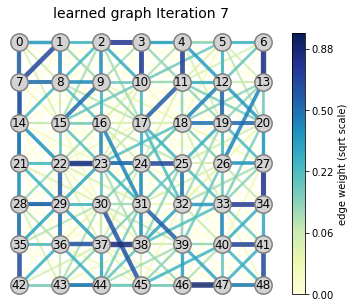

Iteration 8/15
tr(RL)= 47.80982208251953
tr(RL)= 47.816463470458984
  PGD Iter 1/10, tr(RL)= 47.79391098022461
  PGD Iter 2/10, tr(RL)= 47.781829833984375
  PGD Iter 3/10, tr(RL)= 47.77553939819336
  PGD Iter 4/10, tr(RL)= 47.77251434326172
  PGD Iter 5/10, tr(RL)= 47.77094650268555
  PGD Iter 6/10, tr(RL)= 47.7700309753418
  PGD Iter 7/10, tr(RL)= 47.769500732421875
  PGD Iter 8/10, tr(RL)= 47.76914978027344
  PGD Iter 9/10, tr(RL)= 47.768898010253906
  PGD Iter 10/10, tr(RL)= 47.76870346069336
A statistics: min= 0.0 , max= 0.5213022828102112 , mean= 0.07796427607536316
w_0 statistics: min= 0.06698554754257202 , max= 0.856916069984436 , mean= 0.4264666736125946
w statistics: min= 0.0 , max= 0.9232442378997803 , mean= 0.12525460124015808
left edges: 213 / 396


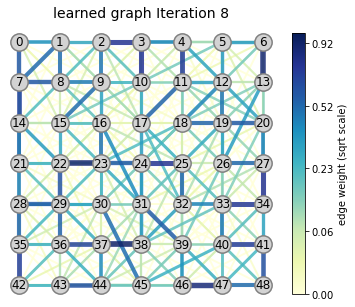

Iteration 9/15
tr(RL)= 47.801021575927734
tr(RL)= 47.80567932128906
  PGD Iter 1/10, tr(RL)= 47.786834716796875
  PGD Iter 2/10, tr(RL)= 47.77945327758789
  PGD Iter 3/10, tr(RL)= 47.776851654052734
  PGD Iter 4/10, tr(RL)= 47.7758903503418
  PGD Iter 5/10, tr(RL)= 47.77540588378906
  PGD Iter 6/10, tr(RL)= 47.77511978149414
  PGD Iter 7/10, tr(RL)= 47.77493667602539
  PGD Iter 8/10, tr(RL)= 47.77483367919922
  PGD Iter 9/10, tr(RL)= 47.77472686767578
  PGD Iter 10/10, tr(RL)= 47.77465057373047
A statistics: min= 0.0 , max= 0.4499262869358063 , mean= 0.07040074467658997
w_0 statistics: min= 0.11905211210250854 , max= 0.8716610670089722 , mean= 0.4972212016582489
w statistics: min= 0.0 , max= 0.907095193862915 , mean= 0.12514786422252655
left edges: 187 / 396


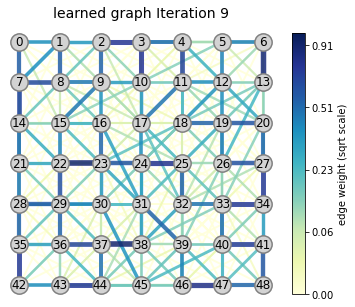

Iteration 10/15
tr(RL)= 47.79608917236328
tr(RL)= 47.79868698120117
  PGD Iter 1/10, tr(RL)= 47.78346252441406
  PGD Iter 2/10, tr(RL)= 47.779178619384766
  PGD Iter 3/10, tr(RL)= 47.77804946899414
  PGD Iter 4/10, tr(RL)= 47.777584075927734
  PGD Iter 5/10, tr(RL)= 47.777286529541016
  PGD Iter 6/10, tr(RL)= 47.77708435058594
  PGD Iter 7/10, tr(RL)= 47.776920318603516
  PGD Iter 8/10, tr(RL)= 47.776763916015625
  PGD Iter 9/10, tr(RL)= 47.77663040161133
  PGD Iter 10/10, tr(RL)= 47.776527404785156
A statistics: min= 0.0 , max= 0.3832836449146271 , mean= 0.06618858873844147
w_0 statistics: min= 0.20315329730510712 , max= 0.8931549191474915 , mean= 0.5741109251976013
w statistics: min= 0.0 , max= 0.8869011402130127 , mean= 0.125300332903862
left edges: 178 / 396


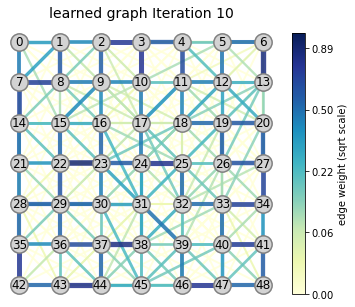

Iteration 11/15
tr(RL)= 47.791748046875
tr(RL)= 47.78935623168945
  PGD Iter 1/10, tr(RL)= 47.777400970458984
  PGD Iter 2/10, tr(RL)= 47.776519775390625
  PGD Iter 3/10, tr(RL)= 47.776092529296875
  PGD Iter 4/10, tr(RL)= 47.775840759277344
  PGD Iter 5/10, tr(RL)= 47.77561950683594
  PGD Iter 6/10, tr(RL)= 47.775421142578125
  PGD Iter 7/10, tr(RL)= 47.77528762817383
  PGD Iter 8/10, tr(RL)= 47.775150299072266
  PGD Iter 9/10, tr(RL)= 47.775028228759766
  PGD Iter 10/10, tr(RL)= 47.77493667602539
A statistics: min= 0.0 , max= 0.41961148381233215 , mean= 0.06379429250955582
w_0 statistics: min= 0.155923992395401 , max= 0.906098484992981 , mean= 0.6101743578910828
w statistics: min= 0.0 , max= 0.844839334487915 , mean= 0.12516915798187256
left edges: 183 / 396


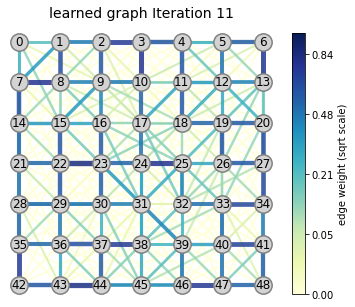

Iteration 12/15
tr(RL)= 47.78596496582031
tr(RL)= 47.72216033935547
  PGD Iter 1/10, tr(RL)= 47.80278015136719
  PGD Iter 2/10, tr(RL)= 47.76031494140625
  PGD Iter 3/10, tr(RL)= 47.78522491455078
  PGD Iter 4/10, tr(RL)= 47.757999420166016
  PGD Iter 5/10, tr(RL)= 47.79071807861328
  PGD Iter 6/10, tr(RL)= 47.75264358520508
  PGD Iter 7/10, tr(RL)= 47.797950744628906
  PGD Iter 8/10, tr(RL)= 47.74638366699219
  PGD Iter 9/10, tr(RL)= 47.80707550048828
  PGD Iter 10/10, tr(RL)= 47.73802947998047
A statistics: min= 0.0 , max= 0.3974968492984772 , mean= 0.05814291164278984
w_0 statistics: min= 0.001206043642014265 , max= 0.9286292791366577 , mean= 0.3505166471004486
w statistics: min= 0.0 , max= 1.1344105005264282 , mean= 0.1223829984664917
left edges: 168 / 396


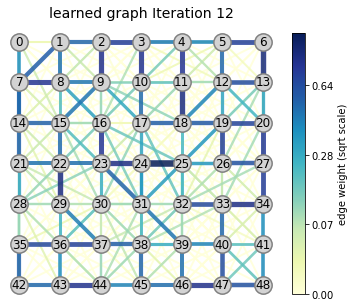

Iteration 13/15
tr(RL)= 47.769229888916016
tr(RL)= 8.970331192016602
  PGD Iter 1/10, tr(RL)= 17.885135650634766
  PGD Iter 2/10, tr(RL)= 17.326557159423828
  PGD Iter 3/10, tr(RL)= 18.31193733215332
  PGD Iter 4/10, tr(RL)= 17.028087615966797
  PGD Iter 5/10, tr(RL)= 18.75205421447754
  PGD Iter 6/10, tr(RL)= 17.988964080810547
  PGD Iter 7/10, tr(RL)= 18.089519500732422
  PGD Iter 8/10, tr(RL)= 17.54531478881836
  PGD Iter 9/10, tr(RL)= 19.049318313598633
  PGD Iter 10/10, tr(RL)= 18.51499366760254
A statistics: min= 0.0 , max= 1.0 , mean= 0.07286016643047333
w_0 statistics: min= 0.0 , max= 0.5582873821258545 , mean= 0.005774282850325108
w statistics: min= 0.0 , max= 5.026317119598389 , mean= 0.04032953456044197
left edges: 105 / 396


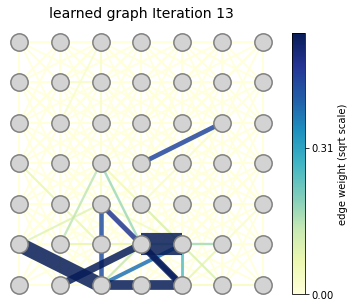

Iteration 14/15
tr(RL)= 14.55921459197998


AssertionError: w has non-zero weights on non-edges!

In [6]:
arg_dict = {
    'mu': 0.15,
    'gamma': 0.4,
    'step_size': 0.005,
    'PGD_step_size': 0.04,
    'c': 16,
    'PGD_iters': 10,
    'GEM_iters': 15,
    'method': 'cholmod',
    'inv_method': 'L+eI',
}

x, w_0, A, w, A_sparsemax = Experiment(arg_dict, num_nodes)